# Visualizing Confusion Matrices - Lab

## Introduction

In this lab, you'll build upon previous lessons on precision, recall and accuracy and create a confusion matrix visualization. You may remember seeing confusion matrices from our KNN work! Now, we'll put that together into a more cohesive visual using matplotlib.  

## Objectives

You will be able to:
* Understand and assess precision recall and accuracy of classifiers
* Evaluate classification models using various metrics

## Confusion matrices

Recall that the confusion matrix represents the counts (or normalized counts) of our True Positives, False Positives, True Negatives and False Negatives. This can further be visualized when analyzing the effectiveness of our classification algorithm.   
  
Here's an example of generating a confusion matrix:
![](./images/confusion_matrix2.png)

With that, let's look at some code for generating this visual.

## Create our model
As usual, we start by fitting a model to our data by importing, normalizing, splitting into train and test sets and then calling our algorithm.

In [1]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas as pd


#Load the data
df = pd.read_csv('heart.csv')

#Define appropriate X and y
X = df[df.columns[:-1]]
y = df.target

#Normalize the Data
for col in df.columns:
    df[col] = (df[col]-min(df[col]))/ (max(df[col]) - min(df[col]))

# Split the data into train and test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

#Fit a model
logreg = LogisticRegression(fit_intercept = False, C = 1e12) #Starter code
model_log = logreg.fit(X_train, y_train)
print(model_log) #Preview model params

#Predict
y_hat_test = logreg.predict(X_test)

#Data Preview
df.head()

LogisticRegression(C=1000000000000.0, class_weight=None, dual=False,
          fit_intercept=False, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l2', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)


/opt/conda/envs/learn-env/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.708333,1.0,1.000000,0.481132,0.244292,1.0,0.0,0.603053,0.0,0.370968,0.0,0.0,0.333333,1.0
1,0.166667,1.0,0.666667,0.339623,0.283105,0.0,0.5,0.885496,0.0,0.564516,0.0,0.0,0.666667,1.0
2,0.250000,0.0,0.333333,0.339623,0.178082,0.0,0.0,0.770992,0.0,0.225806,1.0,0.0,0.666667,1.0
3,0.562500,1.0,0.333333,0.245283,0.251142,0.0,0.5,0.816794,0.0,0.129032,1.0,0.0,0.666667,1.0
4,0.583333,0.0,0.000000,0.245283,0.520548,0.0,0.5,0.702290,1.0,0.096774,1.0,0.0,0.666667,1.0


## Create the confusion matrix
From there it's very easy to create the raw confusion matrix using built in methods:

In [2]:
from sklearn.metrics import confusion_matrix

cnf_matrix = confusion_matrix(y_hat_test, y_test)
print('Confusion Matrix:\n',cnf_matrix)

Confusion Matrix:
 [[24  4]
 [ 9 39]]


## Creating a Nice Visual
Creating a pretty visual is a little more complicated. Generating the initial image is simple but we have to use the itertools package to iterate over the matrix and append labels to the individual cells.

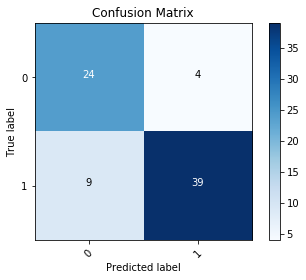

In [3]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline

plt.imshow(cnf_matrix,  cmap=plt.cm.Blues) #Create the basic matrix.

#Add title and Axis Labels
plt.title('Confusion Matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

#Add appropriate Axis Scales
class_names = set(y) #Get class labels to add to matrix
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

#Add Labels to Each Cell
thresh = cnf_matrix.max() / 2. #Used for text coloring below
#Here we iterate through the confusion matrix and append labels to our visualization.
for i, j in itertools.product(range(cnf_matrix.shape[0]), range(cnf_matrix.shape[1])):
        plt.text(j, i, cnf_matrix[i, j],
                 horizontalalignment="center",
                 color="white" if cnf_matrix[i, j] > thresh else "black")

#Add a Side Bar Legend Showing Colors
plt.colorbar()

## Create a general function that plots the confusion matrix
Generalize the above code into a function that you can reuse to create confusion matrix visuals going forward.

In [6]:
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Pseudocode/Outline:
    #Print the confusion matrix (optional)
    #Create the basic matrix.
    #Add title and Axis Labels
    #Add appropriate Axis Scales
    #Add Labels to Each Cell
    #Add a Side Bar Legend Showing Colors
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Update your function to include an option for normalization.
When the normalization parameter is set to True, your function should return percentages for the each label class in the visual rather then raw counts.

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    #Add Normalization Option
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='quadric', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

## Create a normalized confusion matrix
Call you function to create a normalized confusion matrix for the model above.

Normalized confusion matrix
[[0.85714286 0.14285714]
 [0.1875     0.8125    ]]


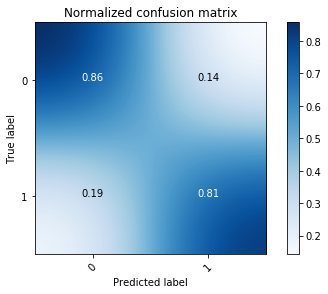

In [28]:
# Plot normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=class_names, normalize=True,
                      title='Normalized confusion matrix')

plt.show()
# Your code here

## Summary
Well done! In this lab we previewed the confusion matrix and practice our matplotlib skills for producing visualizations!